In [5]:
import os
import subprocess
from pathlib import Path

"""
Dynamically find the project root (where .git exists) and set it as the current working directory.
"""
project_root = Path(subprocess.check_output(['git', 'rev-parse', '--show-toplevel'], text=True).strip())
os.chdir(project_root)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

Exploring the number of beers per country
Exploring the number of user per country
number of reviews per country

BeerAdvocate exploration

In [7]:
#number of beers per country
breweries = pd.read_csv('data/minimizedData/RB_breweries_small.csv')
print(breweries.head())


      id          location                       name  nbr_beers
0   3198             Gabon                    Sobraga          3
1  13538  Northern Ireland           Ards Brewing Co.         13
2  22304  Northern Ireland  Barrahooley Craft Brewery          4
3  22818  Northern Ireland                   Boundary         66
4  24297  Northern Ireland            Brewbot Belfast          3


In [ ]:

country_stats = breweries.groupby('location').agg(
    total_breweries=('id', 'nunique'), 
    total_beers=('nbr_beers', 'sum')
).reset_index()

print("Basic stats explorations")
print(country_stats.shape)
#There are 297 different locations where beer originates from

filtered_countries = country_stats[country_stats['total_beers'] >= 4]
print(filtered_countries.shape)
print("there are a total of 267 locations")
print("233 locations have 4 or more beers")
#Do what countries do we automatically remove for our analysis since they don't have enough beers to analyse
#How much do we want to remove

Basic stats explorations
(267, 3)
(233, 3)
there are a total of 267 locations
233 locations have 4 or more beers


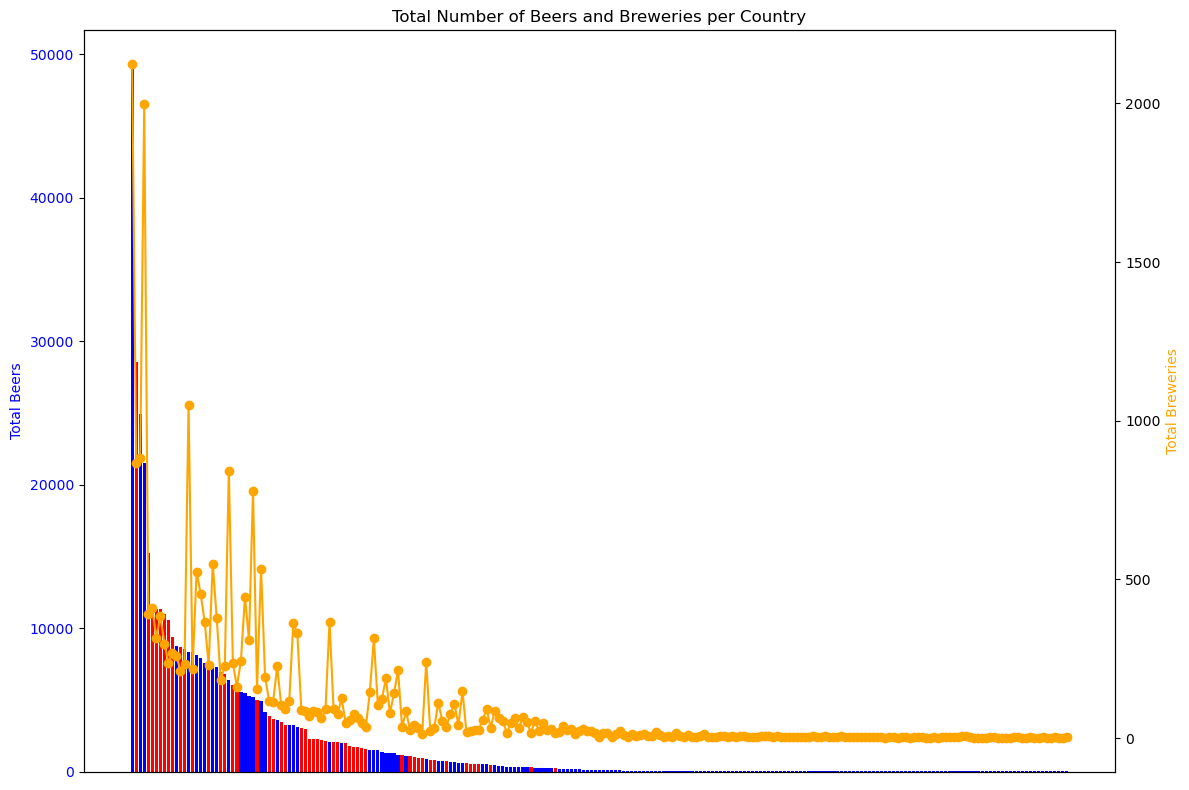

I think looking at the US would be more interesting than anything else


In [ ]:
filtered_countries = filtered_countries.sort_values(by='total_beers', ascending=False)
fig, ax1 = plt.subplots(figsize=(12, 8))
bar_colors = ['red' if country.startswith('United States,') else 'blue' for country in filtered_countries['location']]

ax1.bar(filtered_countries['location'], filtered_countries['total_beers'], color=bar_colors, label='Total Beers')
#ax1.set_xlabel('Country')
ax1.set_ylabel('Total Beers', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks([])

# Overlay line plot for total breweries
ax2 = ax1.twinx()
ax2.plot(filtered_countries['location'], filtered_countries['total_breweries'], color='orange', marker='o', label='Total Breweries')
ax2.set_ylabel('Total Breweries', color='orange')
plt.xticks([])

plt.title('Total Number of Beers and Breweries per Country')
fig.tight_layout()
plt.show()

print("I think looking at the US would be more interesting than anything else")

In [9]:
filtered_us = filtered_countries[filtered_countries['location'].str.startswith('United States,')]


In [6]:

users = pd.read_csv('../../minimizedData/RB_users_small.csv')
print(users.head())
print("Quick stats on the users")
print("total number of users:", users.shape[0])
#remove users with unknown locations
users = users.dropna(subset=['location'])
print("Number of users with known locations:", users.shape[0])
print("Users originate from: ",users['location'].dropna().nunique() , "different locations")

   Unnamed: 0  nbr_ratings  user_id location
0           0         1890   175852   Poland
1           1           89   442761    Spain
2           2          169   288889   Poland
3           3         3371   250510    Spain
4           4        13043   122778  Germany
Quick stats on the users
total number of users: 70174
Number of users with known locations: 50592
Users originate from:  222 different locations


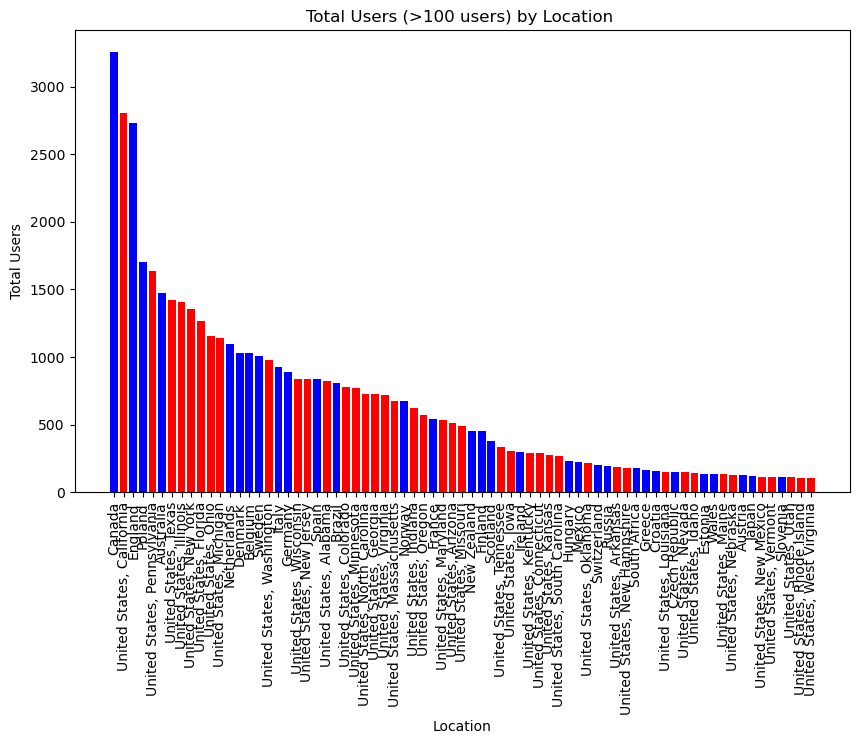

In [7]:

user_counts = users.groupby('location').size().reset_index(name='total_users')
user_counts = user_counts[user_counts['total_users'] >= 100]
user_counts = user_counts.sort_values(by='total_users', ascending=False)
user_counts['color'] = user_counts['location'].apply(lambda x: 'red' if x.startswith('United States,') else 'blue')

plt.figure(figsize=(10, 6))
plt.bar(user_counts['location'], user_counts['total_users'], color=user_counts['color'])
plt.xlabel('Location')
plt.ylabel('Total Users')
plt.title('Total Users (>100 users) by Location ')
plt.xticks(rotation=90)
#plt.xticks([])
plt.show()


In [ ]:
us_users = users[users['location'].str.startswith('United States,')]
us_user_counts = us_users.groupby('location').size().reset_index(name='total_users')

us_user_counts = us_user_counts.sort_values(by='total_users', ascending=False)



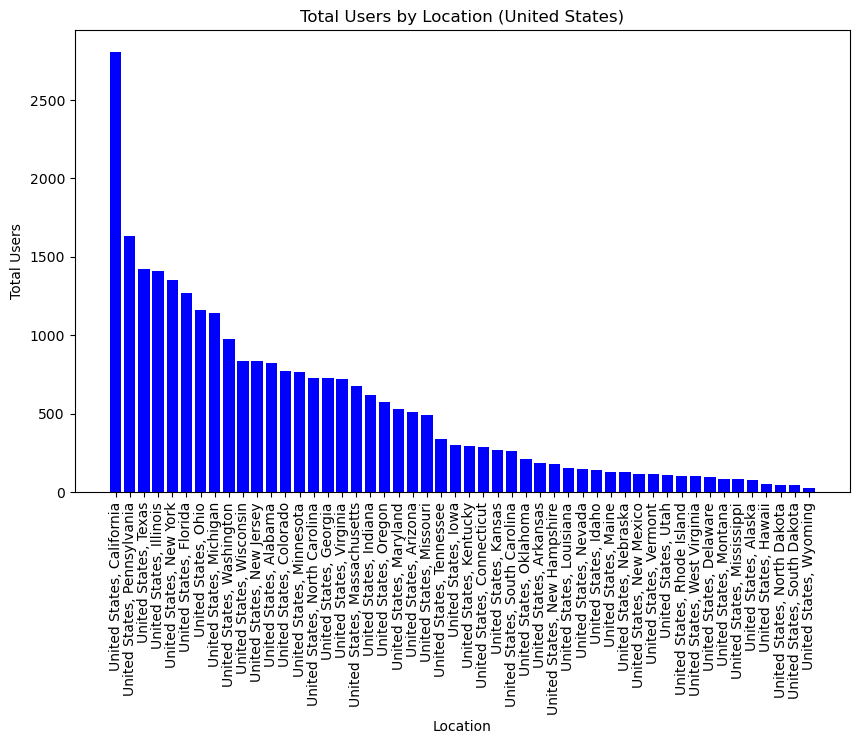

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(us_user_counts['location'], us_user_counts['total_users'], color='blue')
plt.xlabel('Location')
plt.ylabel('Total Users')
plt.title('Total Users by Location (United States)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Remove ratings where user_location and beer location are missing (NaN)
#IDK theres a problem here (look at the graph its not correctly ordered)
BA_merged_cleaned = pd.read_csv('data/minimizedData/RB_ratings_small_plus.csv')

# Clean the data by filtering out NaNs in both user_location and beer_location
#BA_merged_cleaned = BA_merged[BA_merged['user_location'].notna()]
#BA_merged_cleaned = BA_merged_cleaned[BA_merged_cleaned['beer_location'].notna()]

local_reviews = BA_merged_cleaned[BA_merged_cleaned['user_location'] == BA_merged_cleaned['beer_location']].groupby('beer_location').size().reset_index(name='local_reviews')

non_local_reviews = BA_merged_cleaned[BA_merged_cleaned['user_location'] != BA_merged_cleaned['beer_location']].groupby('beer_location').size().reset_index(name='non_local_reviews')

country_stats = breweries.groupby('location').agg(
    total_breweries=('id', 'nunique'), 
    total_beers=('nbr_beers', 'sum')
).reset_index()

country_data = pd.merge(country_stats, local_reviews, left_on='location', right_on='beer_location', how='left')
country_data = pd.merge(country_data, non_local_reviews, left_on='location', right_on='beer_location', how='left')

country_data[['local_reviews', 'non_local_reviews']] = country_data[['local_reviews', 'non_local_reviews']].fillna(0)

country_data = country_data.sort_values(by='local_reviews', ascending=False)


In [11]:
country_data.head()
country_data = country_data.sort_values(by= 'local_reviews', ascending = True)
country_data.head()

,location,total_breweries,total_beers,beer_location_x,local_reviews,beer_location_y,non_local_reviews
133,Myanmar,6,21,NaN,0.0,Myanmar,364.0
61,Falkland Islands,1,5,NaN,0.0,Falkland Islands,6.0
66,French Guiana,1,5,NaN,0.0,French Guiana,48.0
67,French Polynesia,1,5,NaN,0.0,French Polynesia,564.0
68,Gabon,1,3,NaN,0.0,Gabon,38.0


In [ ]:
BA_merged = pd.read_csv('data/minimizedData/RB_ratings_small_plus.csv')
BA_merged_cleaned = BA_merged[BA_merged['user_location'].notna()]
BA_merged_cleaned = BA_merged[BA_merged['beer_location'].notna()]

local_reviews = BA_merged_cleaned[BA_merged_cleaned['user_location'] == BA_merged_cleaned['beer_location']].groupby('beer_location').size().reset_index(name='local_reviews')

non_local_reviews = BA_merged_cleaned[BA_merged_cleaned['user_location'] != BA_merged_cleaned['beer_location']].groupby('beer_location').size().reset_index(name='non_local_reviews')

country_stats = breweries.groupby('location').agg(
    total_breweries=('id', 'nunique'),  
    total_beers=('nbr_beers', 'sum') 
).reset_index()

country_data = pd.merge(country_stats, local_reviews, left_on='location', right_on='beer_location', how='left')
country_data = pd.merge(country_data, non_local_reviews, left_on='location', right_on='beer_location', how='left')

country_data[['local_reviews', 'non_local_reviews']] = country_data[['local_reviews', 'non_local_reviews']].fillna(0)

country_data = country_data.sort_values(by='local_reviews', ascending=False)




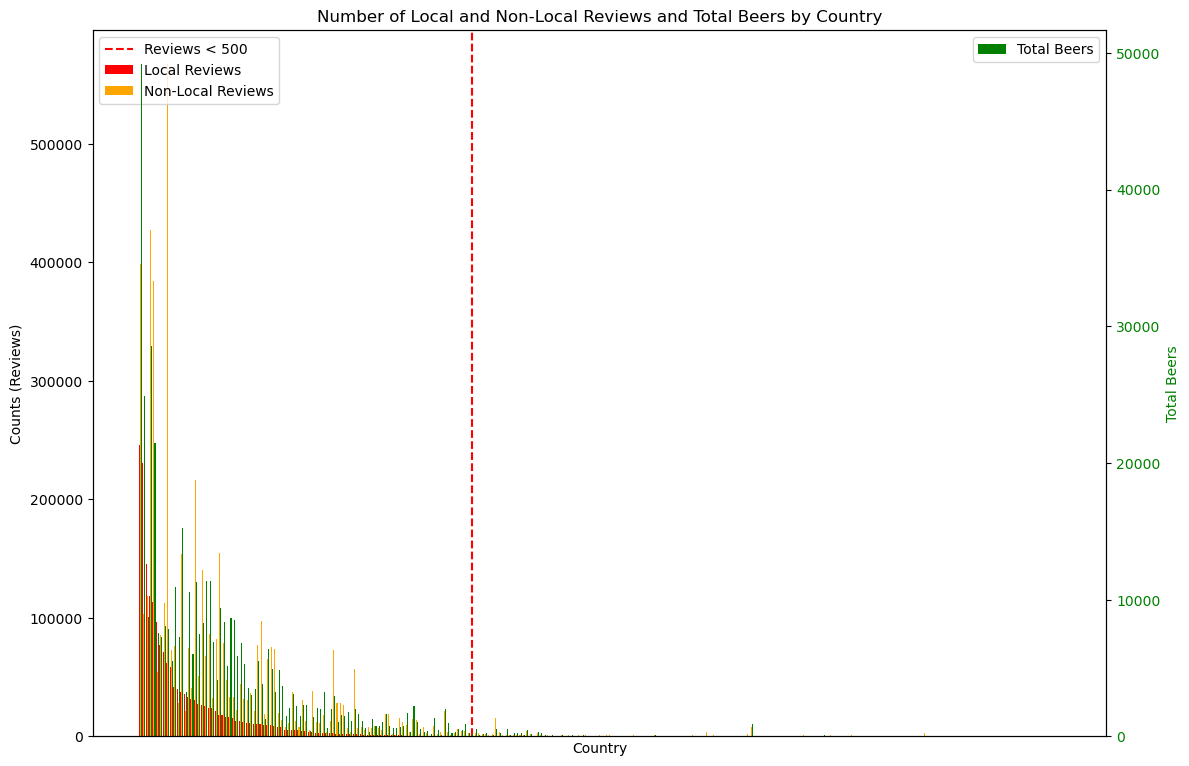

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 8))

bar_width = 0.3
index = range(len(country_data))

bar1 = ax1.bar(index, country_data['local_reviews'], bar_width, label='Local Reviews', color='red')
bar2 = ax1.bar([i + bar_width for i in index], country_data['non_local_reviews'], bar_width, label='Non-Local Reviews', color='orange')


ax1.set_xlabel('Country')
ax1.set_ylabel('Counts (Reviews)', color='black')
ax1.set_title('Number of Local and Non-Local Reviews and Total Beers by Country')


ax2 = ax1.twinx()
bar3 = ax2.bar([i + 2 * bar_width for i in index], country_data['total_beers'], bar_width, label='Total Beers', color='green')

ax2.set_ylabel('Total Beers', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

#where there are less than 500 non local and local reviews
for i in range(len(country_data)):
    if country_data['local_reviews'].iloc[i] < 500 and country_data['non_local_reviews'].iloc[i] < 500:
        line_x = i + bar_width 
        break
if line_x is not None:
    ax1.axvline(x=line_x, color='red', linestyle='--', label='Reviews < 500')

ax1.legend(loc='upper left')
plt.tight_layout()
ax1.set_xticks([])  
plt.show()


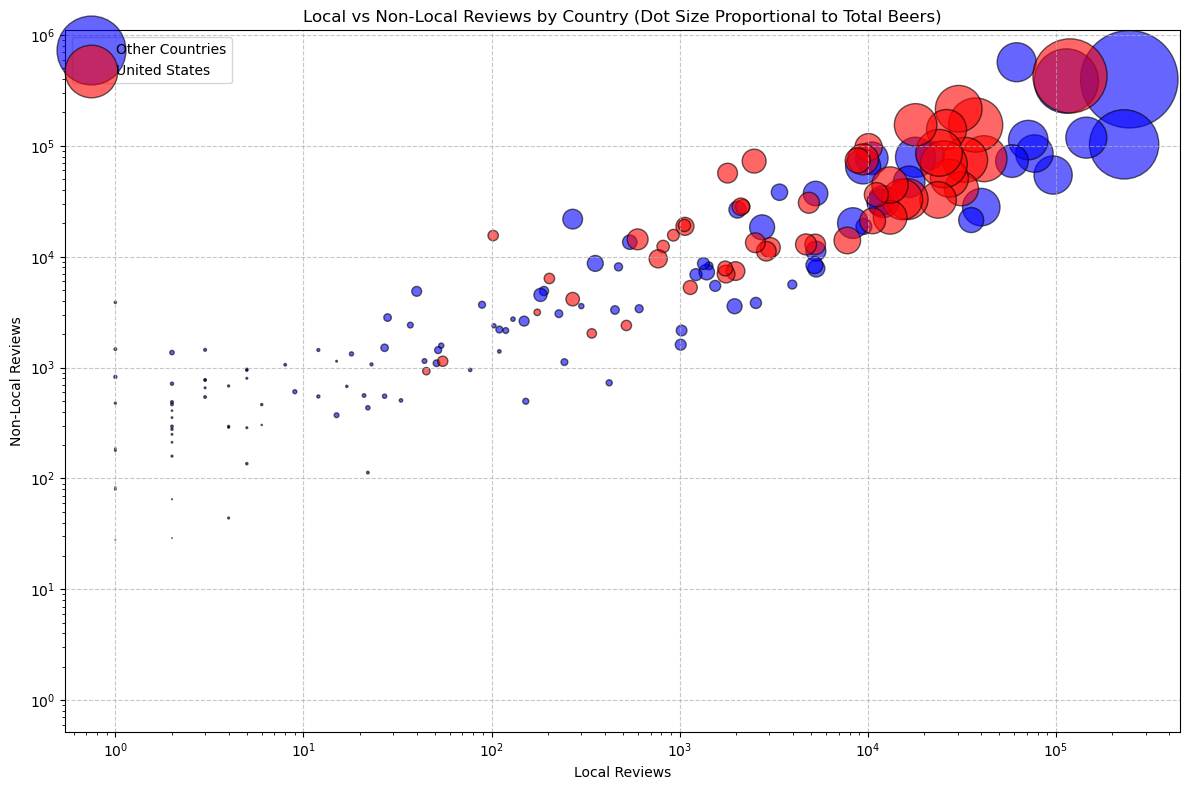

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

highlighted = country_data['location'].str.startswith('United States')

scatter = ax.scatter(
    country_data.loc[~highlighted, 'local_reviews'],
    country_data.loc[~highlighted, 'non_local_reviews'],
    s=country_data.loc[~highlighted, 'total_beers'] * 0.1,
    color='blue', 
    alpha=0.6,
    edgecolor='black',
    label='Other Countries'
)

scatter_us = ax.scatter(
    country_data.loc[highlighted, 'local_reviews'],
    country_data.loc[highlighted, 'non_local_reviews'],
    s=country_data.loc[highlighted, 'total_beers'] * 0.1,
    color='red',
    alpha=0.6,
    edgecolor='black',
    label='United States'
)

ax.set_xlabel('Local Reviews')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Non-Local Reviews')
ax.set_title('Local vs Non-Local Reviews by Country (Dot Size Proportional to Total Beers)')

ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
country_data['local_reviews_z'] = (country_data['local_reviews'] - country_data['local_reviews'].mean()) / country_data['local_reviews'].std()
country_data['non_local_reviews_z'] = (country_data['non_local_reviews'] - country_data['non_local_reviews'].mean()) / country_data['non_local_reviews'].std()

country_data['average_score'] = country_data[['local_reviews_z', 'non_local_reviews_z']].mean(axis=1)

country_data_filtered = country_data[~country_data['location'].str.startswith('United States')]

N = 50
top_locations = country_data_filtered.sort_values(by='average_score', ascending=False).head(N)

print("top N countries with the most data")
print(top_locations[['location', 'average_score']])


top N countries with the most data
             location  average_score
56            England       7.569448
17            Belgium       5.528774
71            Germany       4.985222
32             Canada       4.855144
49            Denmark       3.389780
137       Netherlands       1.962585
156            Poland       1.956732
186            Sweden       1.840377
147            Norway       1.394047
169          Scotland       0.783887
96              Italy       0.688426
10          Australia       0.683259
64            Finland       0.542545
47     Czech Republic       0.536026
65             France       0.416951
182             Spain       0.404236
99              Japan       0.187990
139       New Zealand       0.175375
11            Austria       0.108903
93            Ireland       0.081844
59            Estonia       0.036765
187       Switzerland       0.025566
125            Mexico      -0.038879
161            Russia      -0.092794
26             Brazil      -0.104050
264

We could do a European analysis based on the top N countries above.